In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Importing the libraries

In [45]:
df= pd.read_csv("churn_modelling.csv")

In [46]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
df.shape

(10000, 14)

In [48]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [49]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [52]:
#vissualization

In [53]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [54]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

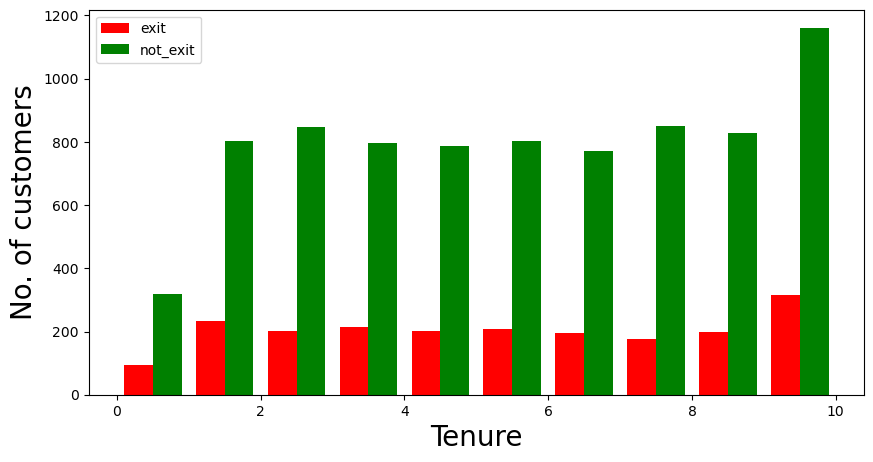

In [55]:
 visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [56]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

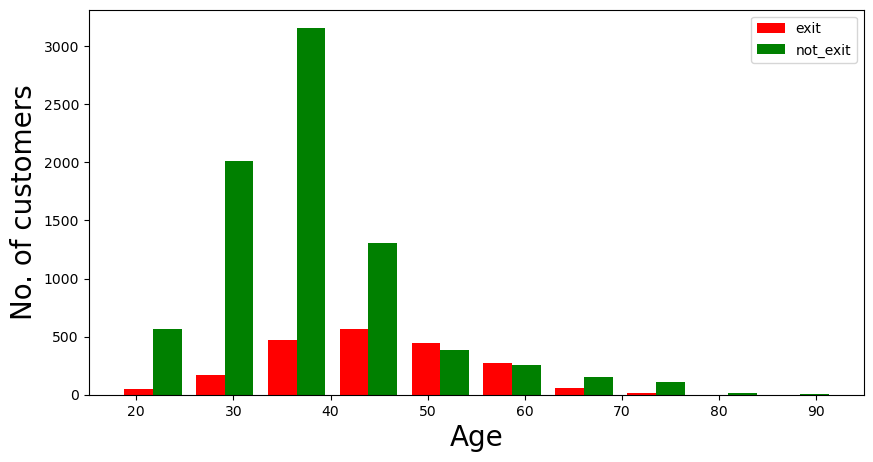

In [57]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

In [58]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [59]:
#Converting the catrgorical variables

In [60]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [61]:
 df = pd.concat([df,gender,states], axis = 1)

In [62]:
# splitting the training and testing dataset


In [63]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [64]:
 X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male']]

In [65]:
y=df['Exited']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [68]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
X_train

array([[-2.14188486,  1.15646656, -0.35886293, ..., -1.02517391,
        -0.51980638, -1.10172081],
       [-1.57723798,  0.48645543,  1.37693067, ..., -1.02517391,
         1.6718767 ,  0.90767097],
       [ 0.01213841, -0.1835557 , -0.35886293, ..., -1.02517391,
         0.74969197, -1.10172081],
       ...,
       [ 1.32964779, -0.94928271,  0.33545451, ..., -1.02517391,
        -0.6621329 , -1.10172081],
       [ 0.68134953,  0.00787605, -1.40033908, ...,  0.97544426,
        -0.41754613,  0.90767097],
       [-0.86620117,  0.39073955, -0.01170421, ...,  0.97544426,
         0.11759448,  0.90767097]])

In [70]:
X_test

array([[ 0.04350769, -0.66213508, -1.05318036, ...,  0.97544426,
        -0.51223628, -1.10172081],
       [-1.19035031, -0.1835557 ,  0.68261323, ...,  0.97544426,
         0.30135987, -1.10172081],
       [ 1.0682372 ,  5.08081749, -0.70602164, ...,  0.97544426,
         1.65970757,  0.90767097],
       ...,
       [-0.56296489,  0.67788718, -0.35886293, ..., -1.02517391,
        -0.72818701, -1.10172081],
       [-1.00213468, -0.75785096,  1.02977195, ..., -1.02517391,
         0.64674307,  0.90767097],
       [-0.36429284, -0.75785096,  0.68261323, ...,  0.97544426,
         1.10580594,  0.90767097]])

In [71]:
# Building a classifier

In [73]:
import keras

ModuleNotFoundError: No module named 'tensorflow'